In [1]:
# First we do a set of imports
import csv
from pprint import pprint
import cinnabar
from cinnabar import plotting as cinnabar_plotting
from cinnabar import femap, stats

In [2]:
# read in the experimental data

experimental_data = {}
experimental_filename = 'experimental_Hpocket.tsv'

with open(experimental_filename, 'r') as fd:
    rd = csv.reader(fd, delimiter="\t", quotechar='"')
    headers = next(rd)
    for row in rd:
        experimental_data[row[0]] = {}
        experimental_data[row[0]]['dG'] = float(row[1])
        experimental_data[row[0]]['ddG'] = float(row[2])

pprint(experimental_data)

{'1': {'dG': -8.56, 'ddG': 0.0},
 '2': {'dG': -9.08, 'ddG': 0.0},
 '3': {'dG': -9.85, 'ddG': 0.0},
 '4': {'dG': -9.39, 'ddG': 0.0},
 '5': {'dG': -10.91, 'ddG': 0.0},
 '6': {'dG': -9.64, 'ddG': 0.0},
 '7': {'dG': -10.37, 'ddG': 0.0},
 '8': {'dG': -9.35, 'ddG': 0.0},
 '9': {'dG': -10.17, 'ddG': 0.0}}


In [3]:
# Read in calculated results

calculated_data = {}
calculated_filename = './final_results_Hpocket_star_FEP.tsv'

with open(calculated_filename, 'r') as fd:
    rd = csv.reader(fd, delimiter="\t", quotechar='"')
    headers = next(rd)
    for row in rd:
        tag = row[0] + "->" + row[1]
        calculated_data[tag] = {}
        calculated_data[tag]['ligand_i'] = row[0]
        calculated_data[tag]['ligand_j'] = row[1]
        calculated_data[tag]['dG'] = float(row[2])
        calculated_data[tag]['ddG'] = float(row[3])

pprint(calculated_data)

{'1->2': {'dG': -0.7233333333333333,
          'ddG': 0.11025223605694154,
          'ligand_i': '1',
          'ligand_j': '2'},
 '1->3': {'dG': -1.6366666666666667,
          'ddG': 0.1319932658214889,
          'ligand_i': '1',
          'ligand_j': '3'},
 '1->4': {'dG': -1.82,
          'ddG': 0.16573070526208067,
          'ligand_i': '1',
          'ligand_j': '4'},
 '1->5': {'dG': -3.4466666666666668,
          'ddG': 0.23837412238374836,
          'ligand_i': '1',
          'ligand_j': '5'},
 '1->6': {'dG': -2.59,
          'ddG': 0.0496655480858379,
          'ligand_i': '1',
          'ligand_j': '6'},
 '1->7': {'dG': -3.2600000000000002,
          'ddG': 0.2353720459187963,
          'ligand_i': '1',
          'ligand_j': '7'},
 '1->8': {'dG': -1.8800000000000001,
          'ddG': 0.09416297927883688,
          'ligand_i': '1',
          'ligand_j': '8'},
 '1->9': {'dG': -4.096666666666667,
          'ddG': 0.20853989759489414,
          'ligand_i': '1',
          'ligand_j'

In [4]:
cinnabar_filename = './final_results_Hpocket_star_FEP_cin.tsv'

with open(cinnabar_filename, 'w') as f:
    f.write("# Experimental block\n")
    f.write("# Ligand, expt_DDG, expt_dDDG\n")
    for entry in experimental_data:
        dG = experimental_data[entry]['dG']
        ddG = experimental_data[entry]['ddG']
        f.write(f"{entry},{dG:.2f},{ddG:.2f}\n")
    f.write('\n')
    f.write('# Calculated block\n')
    f.write('# Ligand1,Ligand2,calc_DDG,calc_dDDG(MBAR),calc_dDDG(additional)\n')
    for entry in calculated_data:
        dG = calculated_data[entry]['dG']
        ddG = calculated_data[entry]['ddG']
        molA = calculated_data[entry]['ligand_i']
        molB = calculated_data[entry]['ligand_j']
        f.write(f"{molA},{molB},{dG:.2f},0,{ddG:.2f}\n")

/home/hiroyuki/miniforge3/envs/openfe_env/lib/python3.12/site-packages/cinnabar/femap.py:35: UserWarning: Assuming kcal/mol units on measurements
  warnings.warn("Assuming kcal/mol units on measurements")


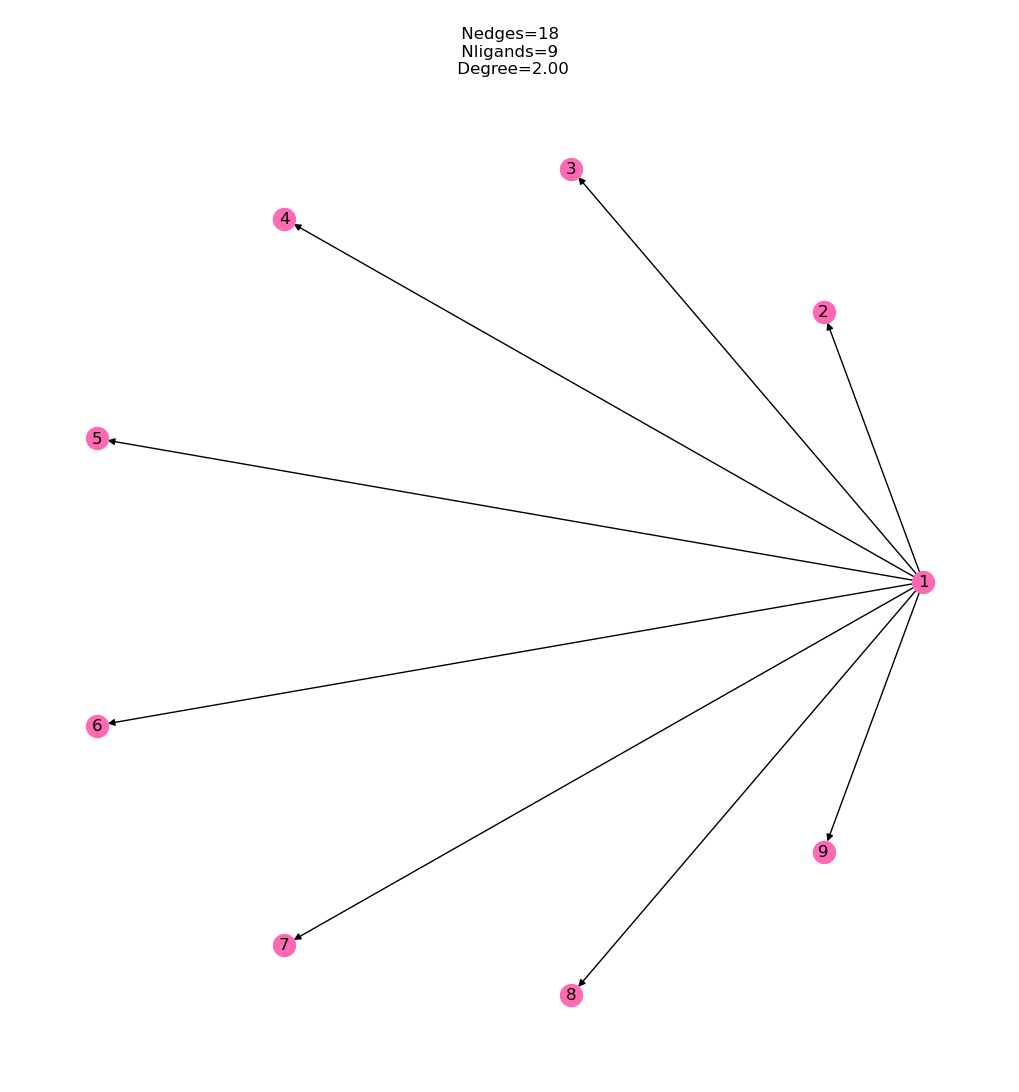

In [5]:
fe = femap.FEMap.from_csv('./final_results_Hpocket_star_FEP_cin.tsv')
fe.generate_absolute_values()  # Get MLE generated estimates of the absolute values
fe.draw_graph()

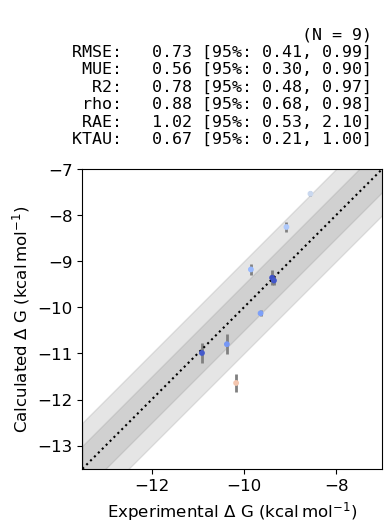

In [6]:
data = femap.read_csv('./final_results_Hpocket_star_FEP_cin.tsv')
exp_DG_sum = sum([data['Experimental'][i].DG for i in data['Experimental'].keys()])
shift = exp_DG_sum / len(data['Experimental'].keys())

cinnabar_plotting.plot_DGs(fe.to_legacy_graph(), figsize=5,  shift=shift.m, filename='./core1_star_1to9_FEP.svg', xy_lim=[-13.5,-7])